# LOAN PREDICTION

Here	are	the	main	steps	i'll	go	through:
1.	Look	at	the	big	picture.
2.	Get	the	data.
3.	Discover	and	visualize	the	data	to	gain	insights.
4.	Prepare	the	data	for	Machine	Learning	algorithms.
5.	Select	a	model	and	train	it. 
6.	Fine-tune	your	model.

In [1]:
# import necessary packages
import numpy as np  # for linear algebra
import pandas as pd  # for data processing
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Get the data

In [2]:
LOAN_PATH = "data/loan_data_set.csv"

data = pd.read_csv(LOAN_PATH)

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Administrator\anaconda3\lib\site

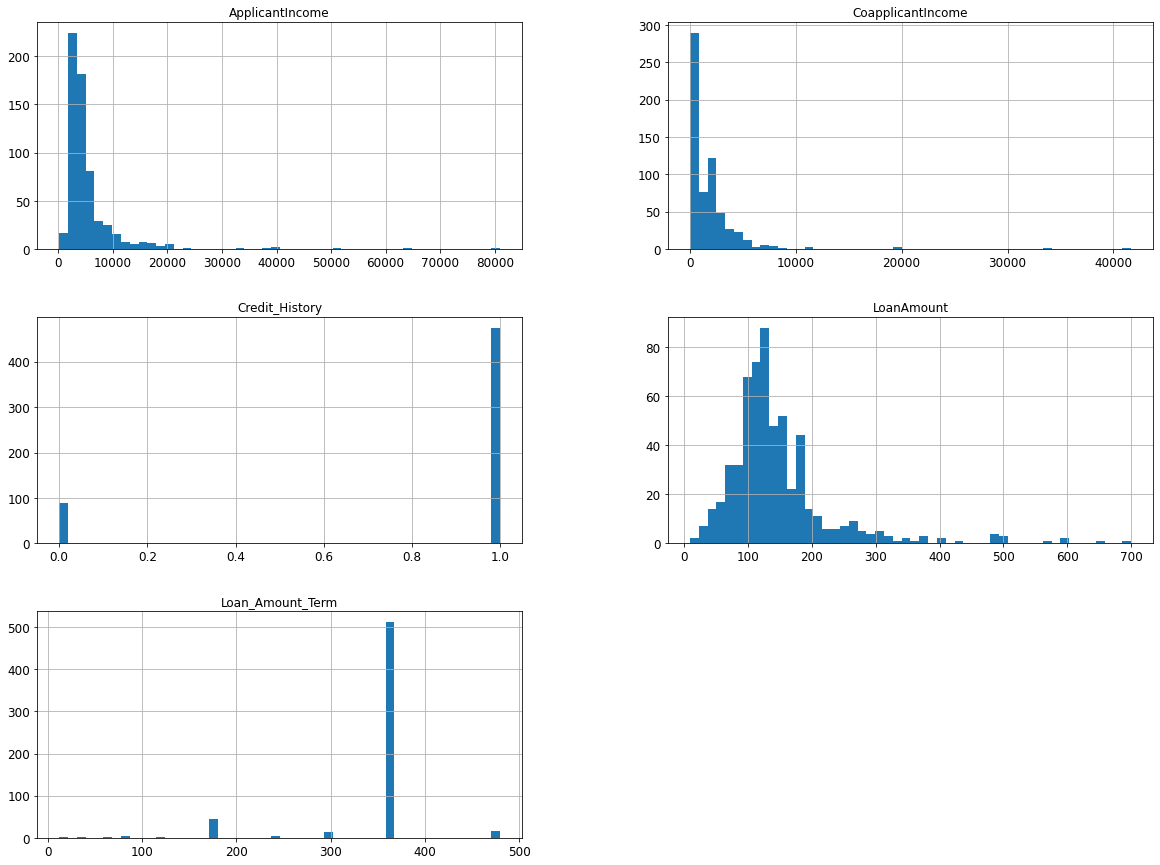

In [6]:
# take a whole look at the numerical data
data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# describe the categorical data ("object")
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002892,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
# i'll drop Loan_ID, because it'll make mislead the model

data.drop('Loan_ID', axis=1, inplace=True)

In [9]:
# check if we got any duplicated rows
data.duplicated().any()

False

Percentage of Y: 0.69
Percentage of N: 0.31


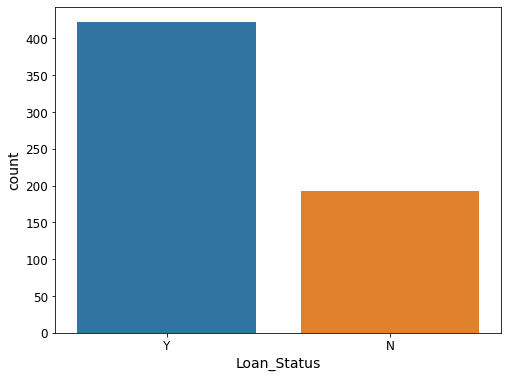

In [10]:
# looking at the target percentage

plt.figure(figsize=(8, 6))
sns.countplot(data['Loan_Status'])

print('Percentage of Y: %.2f'% (data['Loan_Status'].value_counts()[0] / len(data)))
print("Percentage of N: %.2f"% (data['Loan_Status'].value_counts()[1] / len(data)))

This should tell you the possibility for a client to get a loan is high.

## Let's look deeper in the data

In [11]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We can see LoanAmount correlates well with COapplicantIncome and ApplicantIncome

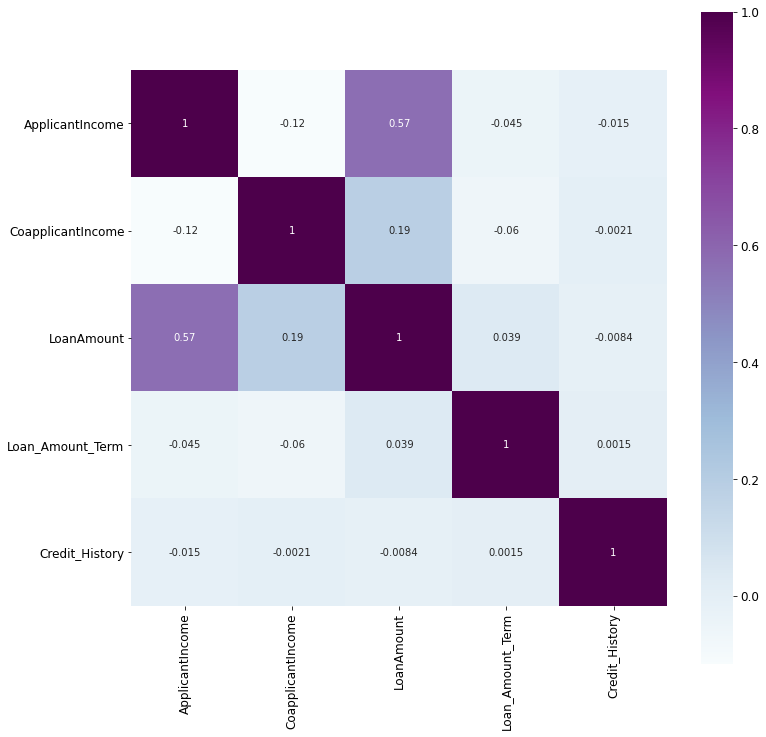

In [12]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.iloc[:, 2:].corr(), annot=True, square=True, cmap='BuPu')
plt.show()

let's understand the distribution of the Loan_Amount and Applicant_Amount as the categorical variables.

looking at the loan status and the client's all credit history, we didn't give a loan for most people who had Credit History = 0
but we did give a loan for most of people who haad Credit History = 1.
so we can say, if you got Credit History = 1 , you will have better chance of getting a loan.

Hence, this is an important feature.

<Figure size 1080x360 with 0 Axes>

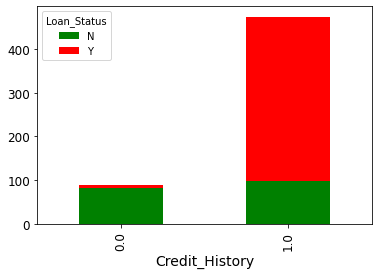

In [13]:
plt.figure(figsize=(15, 5))
t = pd.crosstab(data['Credit_History'], data['Loan_Status'])
t.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

For the Gender, most males got loan and most females got one too
it tells theres no pattern and
i think it's not an important feature for the model


<Figure size 1080x360 with 0 Axes>

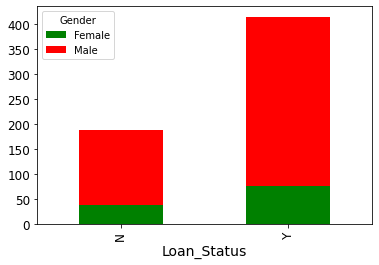

In [14]:
plt.figure(figsize=(15, 5))
t = pd.crosstab(data['Loan_Status'], data['Gender'])
t.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

for the married,  most people who got married got a loan
if you're married then you have better chance to get a loan.

hence, it's a good feature

<Figure size 1080x360 with 0 Axes>

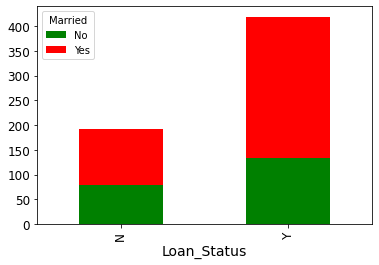

In [15]:
plt.figure(figsize=(15, 5))
t = pd.crosstab(data['Loan_Status'], data['Married'])
t.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

Dependents, first if Dependents = 0 , there's a higher chance to 
get a loan
hence, it's a good feature

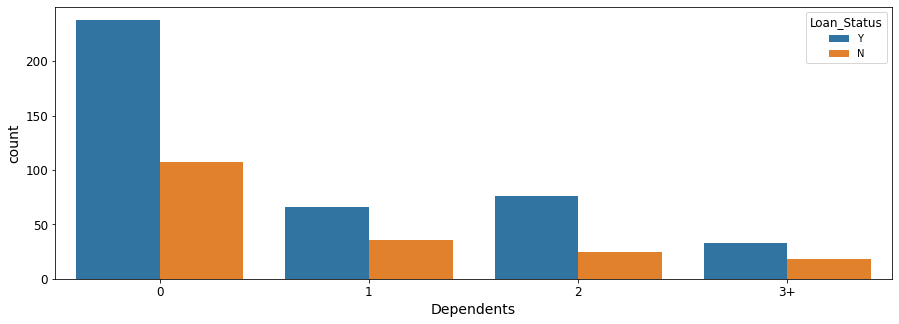

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=data)

for the Education, if you graduate or not you'll get a loan
Hence, no pattern

<Figure size 1080x360 with 0 Axes>

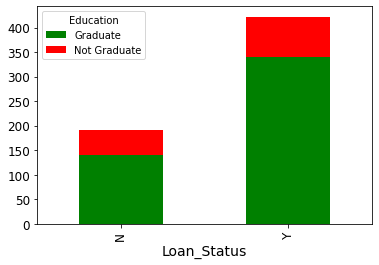

In [17]:
plt.figure(figsize=(15, 5))
t = pd.crosstab(data['Loan_Status'], data['Education'])
t.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

Self_Employed, same as Education
no pattern

<Figure size 1080x360 with 0 Axes>

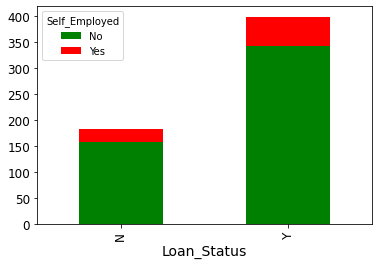

In [18]:
plt.figure(figsize=(15, 5))
t = pd.crosstab(data['Loan_Status'], data['Self_Employed'])
t.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

Property_Area, where you live as serves as a mean of getting a loan
as we can see, Semiurban Property_Area got more than 50% chance to get a loan.

hence, its a good feature

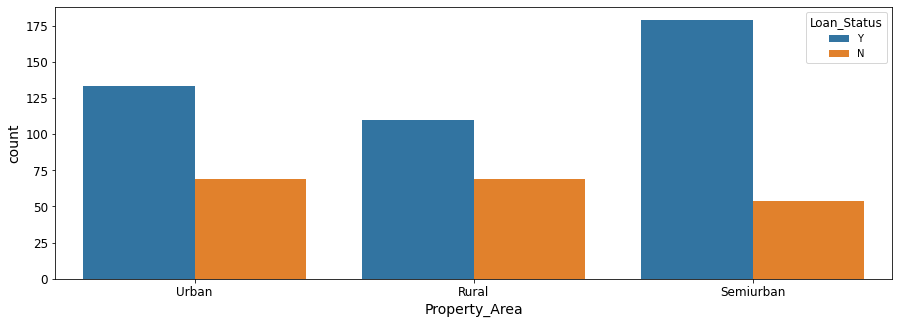

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)

Appilcant Income, serves no pattern

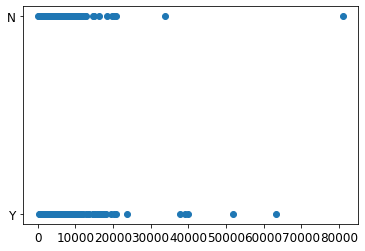

In [20]:
plt.scatter(data['ApplicantIncome'], data['Loan_Status'])

In [21]:
# Coapplicant Income, serves no pattern

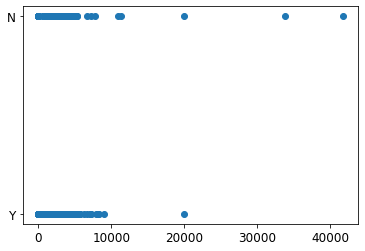

In [22]:
plt.scatter(data['CoapplicantIncome'], data['Loan_Status'])


Applicant Income and CO Applicant Income have outliers

so they are no good feature


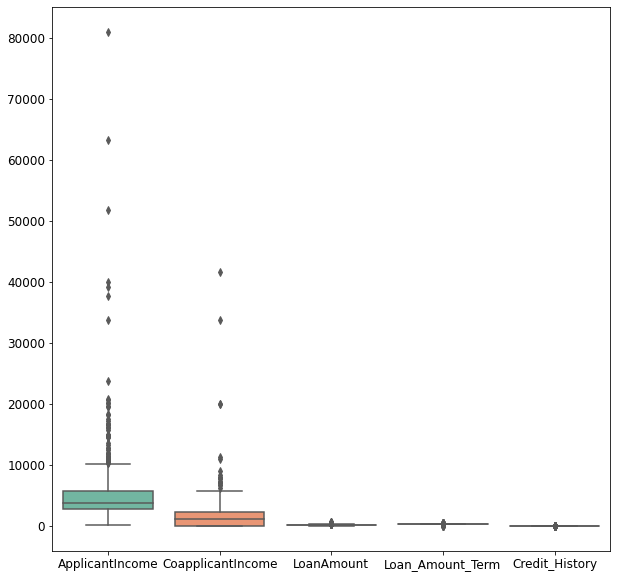

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, palette="Set2")

In [24]:
corr_matrix = data.corr()

Now	let’s	look	at	how	much	each	attribute	correlates	with LoanAmount

In [25]:
corr_matrix['LoanAmount'].sort_values(ascending=False)

LoanAmount           1.000000
ApplicantIncome      0.570909
CoapplicantIncome    0.188619
Loan_Amount_Term     0.039447
Credit_History      -0.008433
Name: LoanAmount, dtype: float64

As we've seen already, LoanAmount correlates better with ApplicantIncome and CoapplicantIncome

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Administrator\anaconda3\lib\site

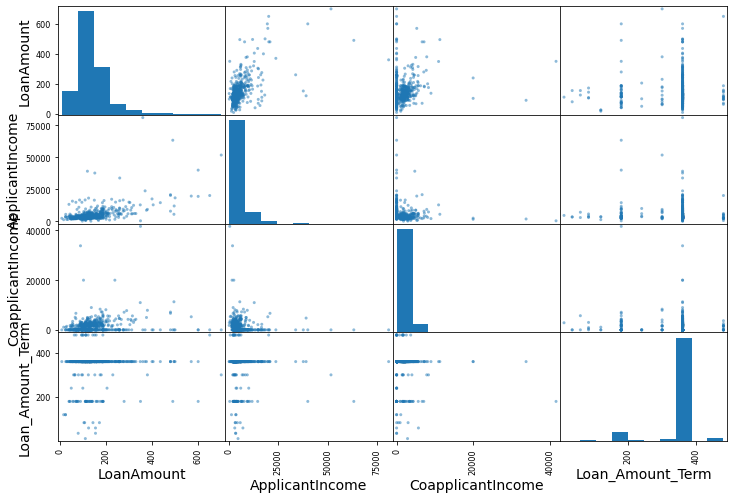

In [26]:
from pandas.plotting import scatter_matrix

attributes = ['LoanAmount', "ApplicantIncome", "CoapplicantIncome",
              "Loan_Amount_Term"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

## Prepare the data for Machine Learning algorithms¶


In [27]:
new_data = data.copy()

Finding missing values

In [28]:
new_data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [29]:
# separating the numerical columns from the categorical

cat_data = []
num_data = []

for i, c in enumerate(new_data.dtypes):
    if c == object:
        cat_data.append(data.iloc[:, i]) # add the whole row at this index
    else:
        num_data.append(data.iloc[:, i])

In [30]:
# the data is flatten in the list, transpose it and add to data frame

cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [31]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [32]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [33]:
# missing values for cat_data
# filling every column with its own most frequent values

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # check if still data missing

False

In [34]:
# missing values for num_data
# filling every column with its previous value in the same column

num_data.fillna(method="bfill", inplace=True)
num_data.isnull().sum().any() # check if still data missing


False

Categorical columns, encoding labels into binary (0, n_classes-1)

In [35]:
bck_cat = cat_data.copy()
bck_num = num_data.copy()

In [36]:
bck_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [37]:
# transform the target column

target_values = {'Y': 1, 'N':0}

target = bck_cat['Loan_Status']
bck_cat.drop('Loan_Status', axis=1, inplace=True) # drop at the column as

target = target.map(target_values)

In [38]:
bck_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


From the cat_data, we can see two nearby values are more similar than two distant values.The Property_Area has 0, 1 and 2 but ML algorithm should be able to read the data; So we one hot encode it.

(for example, categories 0 and 2 are more similar than categories 0 and 1).

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)

for i in bck_cat:
    bck_cat[i] = cat_encoder.fit_transform(bck_cat[[i]])

In [40]:
bck_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,1.0,1.0,0.0


In [41]:
bck_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


Machine	Learning	algorithms	don’t	perform	well	when	the	input	numerical
attributes	have very	different	scales.
	
Data standardization is about making sure that the data is internally consistent. Standardized values are useful for tracking data that isn't easy to compare otherwise.

However, standardization	is	much	less	affected	by	outliers.	

In [42]:
# Scaling Numerical data set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in bck_num:
    bck_num[i] = sc.fit_transform(bck_num[[i]])

In [43]:
bck_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,-0.217057,0.273231,0.433152
1,-0.134412,-0.038732,-0.217057,0.273231,0.433152
2,-0.393747,-0.554487,-0.947774,0.273231,0.433152
3,-0.462062,0.251980,-0.311343,0.273231,0.433152
4,0.097728,-0.554487,-0.063843,0.273231,0.433152
...,...,...,...,...,...
609,-0.410130,-0.554487,-0.888845,0.273231,0.433152
610,-0.212557,-0.554487,-1.254204,-2.522836,0.433152
611,0.437174,-0.472404,1.256161,0.273231,0.433152
612,0.357064,-0.554487,0.478302,0.273231,0.433152


In [44]:
X = pd.concat([bck_cat, bck_num], axis=1)
y = target

In [45]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,1.0,1.0,1.0,1.0,0.0,0.072991,-0.554487,-0.217057,0.273231,0.433152
1,0.0,0.0,0.0,1.0,1.0,1.0,-0.134412,-0.038732,-0.217057,0.273231,0.433152
2,0.0,0.0,1.0,1.0,0.0,0.0,-0.393747,-0.554487,-0.947774,0.273231,0.433152
3,0.0,0.0,1.0,0.0,1.0,0.0,-0.462062,0.251980,-0.311343,0.273231,0.433152
4,0.0,1.0,1.0,1.0,1.0,0.0,0.097728,-0.554487,-0.063843,0.273231,0.433152


In [46]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

### Select and train a model

Using StratfiedShuffleSplit, it return a stratified(subset of the total data) randomized folds. This folds are made by preserving the percentage of samples for each class

For example, a country's population is composed of 51.3% female and 48.7% male, so a well-conducted survey in that country would try to maintain this ratio in the sample: 513 female and 487 male.

This is called stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)


#### Build function

This functions will help evaluate our model to see if it is improving or not, so as not to repeat this step every time.

The linear regression predicted a high possiblity that a loan can be given

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train[:5], y_train[:5])
predictions = lin_reg.predict(X_test)

print("Predictions: ", predictions[:5])
print("Highest Predict: ", max(predictions))

Predictions:  [-0.0264502   0.04701626  0.03453973  0.03659736  0.00182198]
Highest Predict:  1.0419115589304773


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import re

class TrainRunModel:
    
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        self.model_accuracy = {}
        self.predictions = {}
        self.acc = None
        
        self.models = {
                    'Logistic Regression': LogisticRegression(random_state=42),
                    'KNeighbors Classifier': KNeighborsClassifier(),
                    'SVC': SVC(kernel="linear", random_state=42),
                    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=1, random_state=42),
                    'Random Forest Classifier': RandomForestClassifier(n_estimators=10, random_state=42)
                    }
        
    
    def loss(self,y_true, y_pred, retu=False):
        """This function calculates the metrics of the model"""
        pre = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        loss = log_loss(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)
        
        self.acc = acc
        
        if retu:
            
            return pre, rec, f1, loss, acc, model

        else:
            print('  precision: %.3f\n  recall: %.3f\n  f1-score: %.3f\n  loss: %.3f\n  accuracy: %.3f' % (pre, rec, f1, loss, acc))

    

    def train_eval_train(self, search=None):
        """This function evaluate our models in the same data that 
        we train it on .
        The "search params helps to train only the model you want."
        """


        X = self.X_train
        y = self.y_train
        X_tes = self.X_test
        y_tes = self.y_test
        
        if not search:
            for name, model in self.models.items():
                print(name,':')
                model.fit(X, y)
                self.predictions[name] = model.predict(X_tes)
                self.loss(y_tes, model.predict(X_tes))
                self.model_accuracy[name] = self.acc
                print('-'*40)

        else:
            search = search.lower()[:5]
            for name, model in self.models.items():
                print(name,':')
                model.fit(X, y)
                print()
                if re.search(search, name.lower()):
                    self.predictions[name] = model.predict(X_tes)
                    self.loss(y_tes, model.predict(X_tes))
                    self.model_accuracy[name] = self.acc
                    print('-'*40)
                    
        
    def display_accuracy(self):
        return self.model_accuracy
    
    
    def display_predictions(self):
        return self.predictions
    

    def display_predicted_result(self):
        sns.set(style="darkgrid")
        plt.figure(figsize=(12, 6))
        
        print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")
        print("-"*60)
        
        for _, i in self.predictions.items():
            plt.figure()
            ax = sns.countplot(x=i)
            ax.set_title(_)
            ax.set_xticklabels(["Loan Approved", "Loan Not Approved",])
            

In [50]:
model_class = TrainRunModel(X_train, y_train, X_test, y_test)

In [51]:
model_class.train_eval_train()

Logistic Regression :
  precision: 0.818
  recall: 0.474
  f1-score: 0.600
  loss: 6.739
  accuracy: 0.805
----------------------------------------
KNeighbors Classifier :
  precision: 0.613
  recall: 0.500
  f1-score: 0.551
  loss: 8.705
  accuracy: 0.748
----------------------------------------
SVC :
  precision: 0.850
  recall: 0.447
  f1-score: 0.586
  loss: 6.739
  accuracy: 0.805
----------------------------------------
Decision Tree Classifier :
  precision: 0.850
  recall: 0.447
  f1-score: 0.586
  loss: 6.739
  accuracy: 0.805
----------------------------------------
Random Forest Classifier :
  precision: 0.773
  recall: 0.447
  f1-score: 0.567
  loss: 7.301
  accuracy: 0.789
----------------------------------------


In [52]:
model_class.display_accuracy()

{'Logistic Regression': 0.8048780487804879,
 'KNeighbors Classifier': 0.7479674796747967,
 'SVC': 0.8048780487804879,
 'Decision Tree Classifier': 0.8048780487804879,
 'Random Forest Classifier': 0.7886178861788617}

FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 
------------------------------------------------------------


<Figure size 864x432 with 0 Axes>

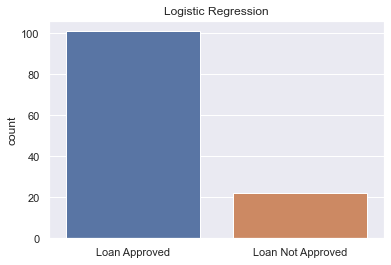

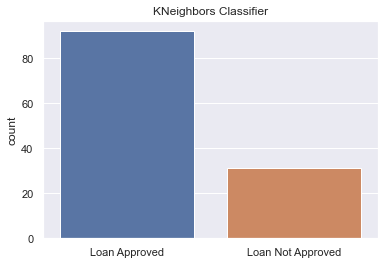

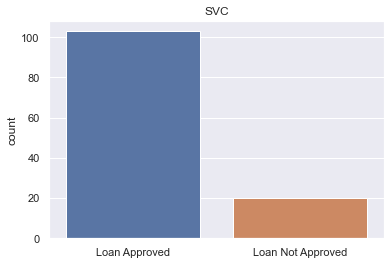

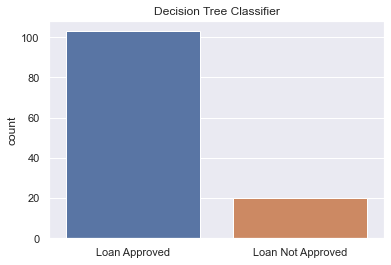

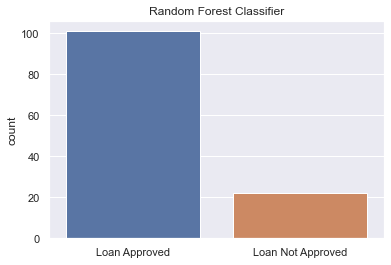

In [53]:
model_class.display_predicted_result()

From the model prediction above, it seems Logistic Regression, Decision Tree classifier and SVC had the best scores

## Fine-tune your model.

In [54]:
# Using Gridsearch

the reason am fine tuning the model with Gridsearch is to get the right hyperparameters our model better.

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn.metrics import make_scorer

param_grid = [
    # am trying 12 (3x4) combinations of hyperparater
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6 , 8]},
    
    # then we try a 6 (2x3) combinations with bootstrap set as False
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2 , 3, 4]}
]

# am using this model because its the best model of our dataset
forest_reg = RandomForestClassifier(random_state=42)

# a multi-metric evaluation 
scoring = {'Accuracy': make_scorer(accuracy_score), 'loss': make_scorer(log_loss)}

# train across 5 folds, that's (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring=scoring, refit='Accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

The best hyperparameter combination found

In [56]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [57]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search.

In [58]:
grid_search.cv_results_

{'mean_fit_time': array([0.03021441, 0.06479635, 0.19639659, 0.03080893, 0.06700225,
        0.23480558, 0.02741952, 0.06980495, 0.19620819, 0.0285974 ,
        0.07699704, 0.20189204, 0.02400517, 0.0616065 , 0.02698736,
        0.06779628, 0.04279485, 0.06879506]),
 'std_fit_time': array([0.00665614, 0.00664001, 0.02488683, 0.00738534, 0.00296517,
        0.10223498, 0.00149272, 0.0040121 , 0.00820472, 0.00241407,
        0.00654342, 0.00582241, 0.00062685, 0.00571222, 0.00316816,
        0.00655349, 0.02626061, 0.00549464]),
 'mean_score_time': array([0.01439714, 0.01561365, 0.02720318, 0.01300149, 0.01639953,
        0.03120055, 0.01260276, 0.01619339, 0.02939372, 0.01100183,
        0.01572685, 0.0317986 , 0.01179266, 0.01618905, 0.01181731,
        0.01580024, 0.01280255, 0.01520262]),
 'std_score_time': array([0.00208262, 0.00135767, 0.00147093, 0.00297098, 0.00149918,
        0.00624431, 0.00241685, 0.0024033 , 0.00257516, 0.00063207,
        0.00102462, 0.00530312, 0.00074062, 

In [59]:
cvres = grid_search.cv_results_

for acc, loss ,params in zip(cvres['mean_fit_time'], cvres['mean_score_time'], cvres['params']):
    print((acc*10), loss, params)

0.30214405059814453 0.014397144317626953 {'max_features': 2, 'n_estimators': 3}
0.6479635238647461 0.015613651275634766 {'max_features': 2, 'n_estimators': 10}
1.963965892791748 0.027203178405761717 {'max_features': 2, 'n_estimators': 30}
0.3080892562866211 0.013001489639282226 {'max_features': 4, 'n_estimators': 3}
0.6700224876403809 0.016399526596069337 {'max_features': 4, 'n_estimators': 10}
2.348055839538574 0.031200551986694337 {'max_features': 4, 'n_estimators': 30}
0.27419519424438477 0.012602758407592774 {'max_features': 6, 'n_estimators': 3}
0.6980495452880859 0.016193389892578125 {'max_features': 6, 'n_estimators': 10}
1.9620819091796875 0.029393720626831054 {'max_features': 6, 'n_estimators': 30}
0.28597402572631836 0.011001825332641602 {'max_features': 8, 'n_estimators': 3}
0.7699704170227051 0.015726852416992187 {'max_features': 8, 'n_estimators': 10}
2.018920421600342 0.031798601150512695 {'max_features': 8, 'n_estimators': 30}
0.2400517463684082 0.011792659759521484 {'bo

In [60]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_Accuracy,split1_test_Accuracy,...,mean_test_loss,std_test_loss,rank_test_loss,split0_train_loss,split1_train_loss,split2_train_loss,split3_train_loss,split4_train_loss,mean_train_loss,std_train_loss
0,0.030214,0.006656,0.014397,0.002083,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",0.686869,0.704082,...,9.211849,1.903652,4,2.290860e+00,1.757719e+00,1.757711e+00,2.197133e+00,2.285024e+00,2.057689e+00,0.247169
1,0.064796,0.006640,0.015614,0.001358,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.757576,0.755102,...,7.807050,1.091708,17,1.145421e+00,1.054621e+00,7.030794e-01,8.788493e-01,7.030794e-01,8.970100e-01,0.180054
2,0.196397,0.024887,0.027203,0.001471,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.757576,0.755102,...,7.877534,1.097348,15,2.643274e-01,1.757719e-01,9.992007e-16,9.992007e-16,9.992007e-16,8.801985e-02,0.111380
3,0.030809,0.007385,0.013001,0.002971,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",0.646465,0.755102,...,8.927055,1.744579,6,2.026530e+00,1.845602e+00,2.109252e+00,2.109250e+00,2.197135e+00,2.057554e+00,0.118924
4,0.067002,0.002965,0.016400,0.001499,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",0.737374,0.755102,...,8.228554,0.543474,11,8.810933e-01,8.788493e-01,1.054623e+00,8.788513e-01,8.788513e-01,9.144537e-01,0.070090
5,0.234806,0.102235,0.031201,0.006244,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",0.747475,0.734694,...,8.088290,0.849390,14,1.762182e-01,1.757719e-01,1.757719e-01,9.992007e-16,9.992007e-16,1.055524e-01,0.086183
6,0.027420,0.001493,0.012603,0.002417,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",0.707071,0.755102,...,9.213286,0.791658,3,1.850306e+00,2.636578e+00,2.021374e+00,1.757709e+00,2.021361e+00,2.057466e+00,0.306838
7,0.069805,0.004012,0.016193,0.002403,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",0.727273,0.734694,...,8.227846,0.988042,12,7.048730e-01,8.788493e-01,7.030835e-01,7.030794e-01,1.142506e+00,8.264783e-01,0.171964
8,0.196208,0.008205,0.029394,0.002575,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",0.767677,0.806122,...,7.314344,0.493941,18,2.643274e-01,8.788696e-02,8.788696e-02,8.788493e-02,9.992007e-16,1.055972e-01,0.086356
9,0.028597,0.002414,0.011002,0.000632,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",0.696970,0.755102,...,8.648661,1.021484,8,2.114637e+00,1.933483e+00,1.669822e+00,2.460794e+00,2.636570e+00,2.163061e+00,0.349626


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import re

class TrainRunModel:
    
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        self.model_accuracy = {}
        self.predictions = {}
        self.acc = None
        
        self.models = {
                    'Logistic Regression': LogisticRegression(random_state=42),
                    'KNeighbors Classifier': KNeighborsClassifier(),
                    'SVC': SVC(kernel="linear", random_state=42),
                    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=1, random_state=42),
                    'Random Forest Classifier': RandomForestClassifier(max_features=6, n_estimators=30, max_leaf_nodes=16, n_jobs=-1, random_state=42)
                    }
        
    
    def loss(self,y_true, y_pred, retu=False):
        """This function calculates the metrics of the model"""
        pre = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        loss = log_loss(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)
        
        self.acc = acc
        
        if retu:
            
            return pre, rec, f1, loss, acc, model

        else:
            print('  precision: %.3f\n  recall: %.3f\n  f1-score: %.3f\n  loss: %.3f\n  accuracy: %.3f' % (pre, rec, f1, loss, acc))

    

    def train_eval_train(self, search=None):
        """This function evaluate our models in the same data that 
        we train it on .
        The "search params helps to train only the model you want."
        """


        X = self.X_train
        y = self.y_train
        X_tes = self.X_test
        y_tes = self.y_test
        
        if not search:
            for name, model in self.models.items():
                print(name,':')
                model.fit(X, y)
                self.predictions[name] = model.predict(X_tes)
                self.loss(y_tes, model.predict(X_tes))
                self.model_accuracy[name] = self.acc
                print('-'*40)

        else:
            search = search.lower()[:5]
            for name, model in self.models.items():
                print(name,':')
                model.fit(X, y)
                print()
                if re.search(search, name.lower()):
                    self.predictions[name] = model.predict(X_tes)
                    self.loss(y_tes, model.predict(X_tes))
                    self.model_accuracy[name] = self.acc
                    print('-'*40)
                    
        
    def display_accuracy(self):
        return self.model_accuracy
    
    
    def display_predictions(self):
        return self.predictions
    

    def display_predicted_result(self):
        sns.set(style="darkgrid")
        plt.figure(figsize=(12, 6))
        
        print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")
        print("-"*60)
        
        for _,i in self.predictions.items():
            plt.figure()
            ax = sns.countplot(x=i)
            ax.set_title(_)
            ax.set_xticklabels(["Loan Approved", "Loan Not Approved",])
            

In [62]:
model_class = TrainRunModel(X_train, y_train, X_test, y_test)

In [63]:
model_class.train_eval_train("rand")

Logistic Regression :

KNeighbors Classifier :

SVC :

Decision Tree Classifier :

Random Forest Classifier :

  precision: 0.783
  recall: 0.474
  f1-score: 0.590
  loss: 7.020
  accuracy: 0.797
----------------------------------------


FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 
------------------------------------------------------------


<Figure size 864x432 with 0 Axes>

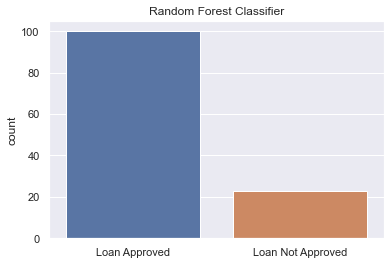

In [64]:
model_class.display_predicted_result()

GridCV gave us a good  hyperparameter combination but than that of the first combinations we used.

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn.metrics import make_scorer
import numpy as np

# a search hyperparameter search space
param_grid = [
    # am trying 12 (3x4) combinations of hyperparater
    {'C': np.logspace(0, 4 , 20), 'penalty': ['l1', 'l2']}    
]

# am using this model because its the best model of our dataset
log_reg = LogisticRegression(random_state=42)

# a multi-metric evaluation 
scoring = {'Accuracy': make_scorer(accuracy_score), 'loss': make_scorer(log_loss)}

# train across 5 folds, that's (12+6)*5=90 rounds of training
grid_search = GridSearchCV(log_reg, scoring=scoring, refit='loss', param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   15.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e+00, 1.6237...
       4.83293024e+01, 7.84759970e+01, 1.27427499e+02, 2.06913808e+02,
       3.35981829e+02, 5.45559478e+02, 8.85866790e+02, 1.43844989e+03,
       2.33572147e+03, 3.79269019e+03, 6.15848211e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2']}],
             pre_dispatc

In [66]:
grid_search.best_params_

{'C': 6.951927961775605, 'penalty': 'l2'}

In [67]:
log_gridsearch = grid_search.estimator

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import re

class TrainRunModel:
    
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        self.model_accuracy = {}
        self.predictions = {}
        self.acc = None
        
        self.models = {
                    'Logistic Regression': LogisticRegression(C=6.951927961, penalty='l2', random_state=42),
                    'KNeighbors Classifier': KNeighborsClassifier(),
                    'SVC': SVC(kernel="linear", random_state=42),
                    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=1, random_state=42),
                    'Random Forest Classifier': RandomForestClassifier(max_features=6, n_estimators=30, max_leaf_nodes=16, n_jobs=-1, random_state=42)
           }
        
    
    def loss(self,y_true, y_pred, retu=False):
        """This function calculates the metrics of the model"""
        pre = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        loss = log_loss(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)
        
        self.acc = acc
        
        if retu:
            
            return pre, rec, f1, loss, acc, model

        else:
            print('  precision: %.3f\n  recall: %.3f\n  f1-score: %.3f\n  loss: %.3f\n  accuracy: %.3f' % (pre, rec, f1, loss, acc))

    

    def train_eval_train(self, search=None):
        """This function evaluate our models in the same data that 
        we train it on .
        The "search params helps to train only the model you want."
        """


        X = self.X_train
        y = self.y_train
        X_tes = self.X_test
        y_tes = self.y_test
        
        if not search:
            for name, model in self.models.items():
                print(name,':')
                model.fit(X, y)
                self.predictions[name] = model.predict(X_tes)
                self.loss(y_tes, model.predict(X_tes))
                self.model_accuracy[name] = self.acc
                print('-'*40)

        else:
            search = search.lower()[:5]
            for name, model in self.models.items():
                print(name,':')
                model.fit(X, y)
                print()
                if re.search(search, name.lower()):
                    self.predictions[name] = model.predict(X_tes)
                    self.loss(y_tes, model.predict(X_tes))
                    self.model_accuracy[name] = self.acc
                    print('-'*40)
                    
        
    def display_accuracy(self):
        return self.model_accuracy
    
    
    def display_predictions(self):
        return self.predictions
    

    def display_predicted_result(self):
        sns.set(style="darkgrid")
        plt.figure(figsize=(12, 6))
        
        print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")
        print("-"*60)
        
        for _,i in self.predictions.items():
            plt.figure()
            ax = sns.countplot(x=i)
            ax.set_title(_)
            ax.set_xticklabels(["Loan Approved", "Loan Not Approved",])
            

In [69]:
model_class = TrainRunModel(X_train, y_train, X_test, y_test)

In [70]:
model_class.train_eval_train("log")

Logistic Regression :

  precision: 0.818
  recall: 0.474
  f1-score: 0.600
  loss: 6.739
  accuracy: 0.805
----------------------------------------
KNeighbors Classifier :

SVC :

Decision Tree Classifier :

Random Forest Classifier :



FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 
------------------------------------------------------------


<Figure size 864x432 with 0 Axes>

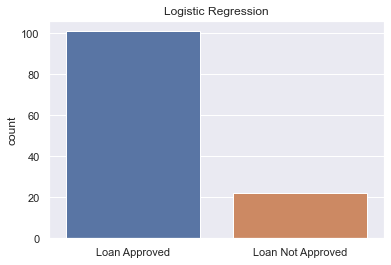

In [71]:
model_class.display_predicted_result()

Using a Voting classifier to show which model classifies best.


In [72]:
clf_dict =  {  'Logistic Regression': LogisticRegression(random_state=42),
                    'KNeighbors Classifier': KNeighborsClassifier(),
                    'SVC': SVC(kernel="linear", random_state=42),
                    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=1, random_state=42),
                    'Random Forest Classifier': RandomForestClassifier(max_features=6, n_estimators=30, max_leaf_nodes=16, n_jobs=-1, random_state=42)
            }

In [73]:
from sklearn.ensemble import VotingClassifier

for _, i in clf_dict.items():
    voting_clf = VotingClassifier(
                estimators=[(_, i)], voting='hard')
    voting_clf.fit(X_train, y_train)

In [74]:
from sklearn.metrics import accuracy_score

for _, clf in clf_dict.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8048780487804879
KNeighborsClassifier 0.7479674796747967
SVC 0.8048780487804879
DecisionTreeClassifier 0.8048780487804879
RandomForestClassifier 0.7967479674796748


We can see it's just like our display_accuracy() in the TrainRunModel class

But we can get more accuracy and less loss if we do more feature engineering on the data.